# Regression TEST

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

### Data preparation

In [4]:
df = pd.read_csv("train_cleaned.csv")
df = df.replace({"explicit": {False:0, True:1}})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  int64  
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  time_signature    15000 non-null  float6

In [6]:
test = pd.read_csv("test_cleaned.csv")
test = test.replace({"explicit": {False:0, True:1}})

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5000 non-null   object 
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   int64  
 3   popularity        5000 non-null   int64  
 4   artists           5000 non-null   object 
 5   album_name        5000 non-null   object 
 6   danceability      5000 non-null   float64
 7   energy            5000 non-null   float64
 8   key               5000 non-null   int64  
 9   loudness          5000 non-null   float64
 10  speechiness       5000 non-null   float64
 11  acousticness      5000 non-null   float64
 12  instrumentalness  5000 non-null   float64
 13  liveness          5000 non-null   float64
 14  valence           5000 non-null   float64
 15  tempo             5000 non-null   float64
 16  time_signature    5000 non-null   float64


In [8]:
Lista_modelli = ["Uni simple", "Uni ridge", "Uni lasso", "Uni Non-lin dec tree" ,"Uni Non-lin knn", "Multi simple", "multi ridge", "multi lasso", "dec tree", "multi Knn"]
Lista_mse = []
Lista_mae = []
Lista_r2 = []

# Univariate Regression (2 variables)

## Linear Regression

### simple

In [9]:
X_train = df["instrumentalness"].values.reshape(-1, 1)
y_train = df["popularity"].values

X_test = test["instrumentalness"].values.reshape(-1, 1)
y_test = test["popularity"].values

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-12.95263712]
Intercept: 
 31.137628223247432


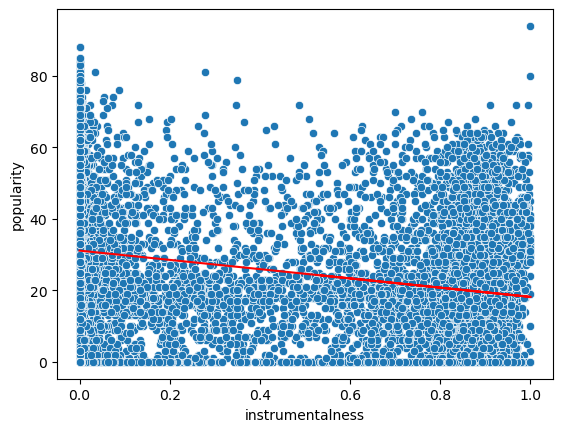

In [12]:
sns.scatterplot(data=df, x="instrumentalness", y="popularity")
plt.plot(X_train, reg.coef_*X_train+reg.intercept_, c="red")
plt.show()

In [13]:
y_pred = reg.predict(X_train)

print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.071
MSE: 320.874
MAE: 14.820


In [14]:
y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

R2: 0.090
MSE: 316.436
MAE: 14.763


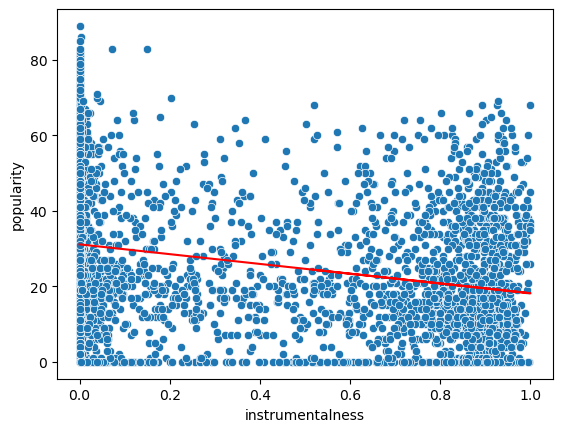

In [15]:
sns.scatterplot(data=test, x="instrumentalness", y="popularity")
plt.plot(X_test, reg.coef_*X_test+reg.intercept_, c="red")
plt.show()

### Ridge

In [16]:
reg = Ridge(alpha=5.175599632000338)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)


y_pred = reg.predict(X_train)

print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

Coefficients: 
 [-12.92222853]
Intercept: 
 31.128909046591215
R2: 0.071
MSE: 320.874
MAE: 14.820
R2: 0.090
MSE: 316.453
MAE: 14.763


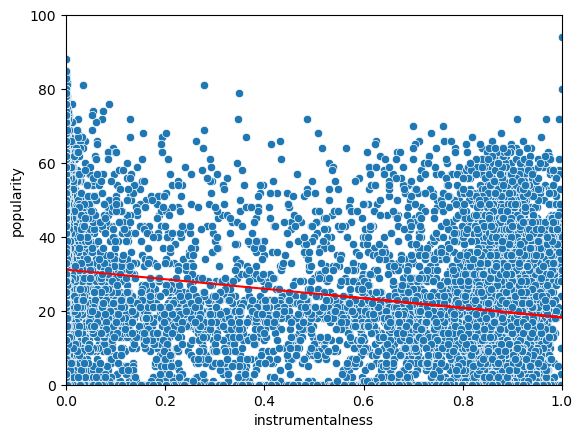

In [17]:
sns.scatterplot(data=df, x="instrumentalness", y="popularity")
plt.plot(X_train, reg.coef_*X_train+reg.intercept_, c="red")
plt.ylim(0, 100)  # Limit y-axis to 0-100
plt.xlim(0, 1)  # Limit x-axis to 0-100
plt.show()

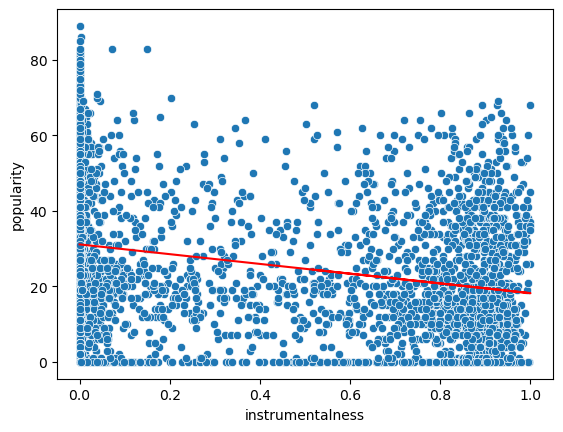

In [18]:
sns.scatterplot(data=test, x="instrumentalness", y="popularity")
plt.plot(X_test, reg.coef_*X_test+reg.intercept_, c="red")
plt.show()

### Lasso

In [19]:
reg = Lasso(alpha=0.11044234247204798)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_train)

print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

Coefficients: 
 [-12.19941156]
Intercept: 
 30.921652839341736
R2: 0.071
MSE: 320.957
MAE: 14.833
R2: 0.089
MSE: 316.922
MAE: 14.786


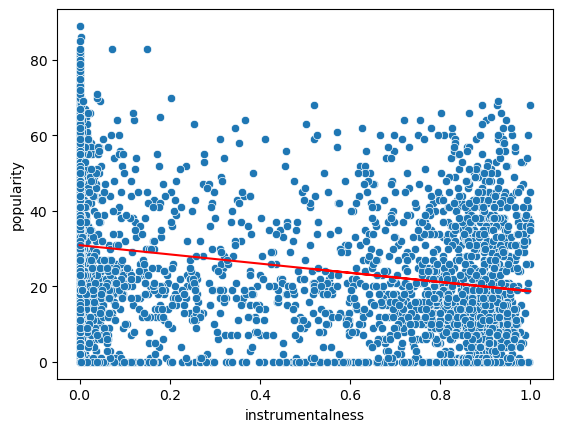

In [20]:
sns.scatterplot(data=test, x="instrumentalness", y="popularity")
plt.plot(X_test, reg.coef_*X_test+reg.intercept_, c="red")
plt.show()

## Nonlinear regression

### Decision Tree Regressor

In [21]:
reg = DecisionTreeRegressor(ccp_alpha=0.3745401188473625, max_depth=29, max_features='log2', min_samples_leaf=43, min_samples_split=9)

In [22]:
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

R2: 0.108
MSE: 308.050
MAE: 14.316
R2: 0.121
MSE: 305.950
MAE: 14.336


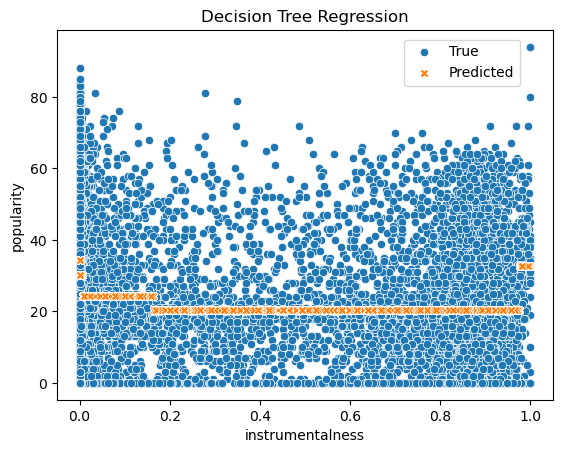

In [23]:
sns.scatterplot(data=df, x="instrumentalness", y="popularity", label="True")
sns.scatterplot(data=df, x="instrumentalness", y=reg.predict(X_train), label="Predicted", marker="X")
plt.title('Decision Tree Regression')
plt.legend(loc='lower left', bbox_to_anchor=(0.70, 0.85), borderaxespad=0)
plt.savefig('DT_REG.png')
plt.show()

### KNN Regressor

In [24]:
reg = KNeighborsRegressor(algorithm='kd_tree',n_neighbors=260,p=2,weights='uniform')

In [25]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=260)

In [26]:
y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.110
MSE: 307.604
MAE: 14.309


In [27]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

R2: 0.126
MSE: 304.143
MAE: 14.293


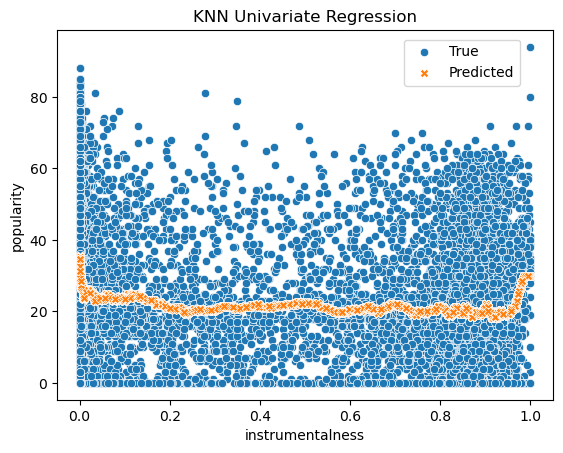

In [28]:
sns.scatterplot(data=df, x="instrumentalness", y="popularity", label="True")
sns.scatterplot(data=df, x="instrumentalness", y=reg.predict(X_train), label="Predicted", marker="X")
plt.title('KNN Univariate Regression')
plt.legend(loc='lower left', bbox_to_anchor=(0.70, 0.85), borderaxespad=0)
plt.savefig('KNN_REG.png')
plt.show()

# Multivariate Regression (ALL variables)

In [29]:
X_train = df[["instrumentalness", "speechiness", "loudness", "duration_ms", 'valence', 'liveness','acousticness','danceability', 'energy']].values
y_train = df["popularity"].values

X_test = test[["instrumentalness", "speechiness", "loudness", "duration_ms", 'valence', 'liveness','acousticness','danceability', 'energy']].values
y_test = test["popularity"].values


## Linear Regression

### simple

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.102
MSE: 310.133
MAE: 14.410


In [32]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

R2: 0.118
MSE: 306.885
MAE: 14.374


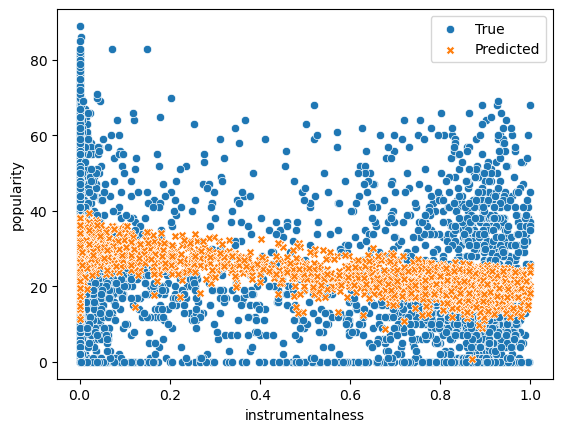

In [33]:
sns.scatterplot(data=test, x='instrumentalness', y="popularity", label="True")
sns.scatterplot(data=test, x="instrumentalness", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

### Ridge

In [34]:
reg = Ridge(alpha=1.3010318597055903)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

Coefficients: 
 [-1.42782051e+01 -2.64434359e+01 -2.57360932e-02 -6.59707563e-06
 -1.32648435e+00  2.75770447e+00  2.55699491e+00  4.04952039e+00
 -4.51784876e+00]
Intercept: 
 35.07019467665964
R2: 0.102
MSE: 310.134
MAE: 14.411
R2: 0.118
MSE: 306.890
MAE: 14.375


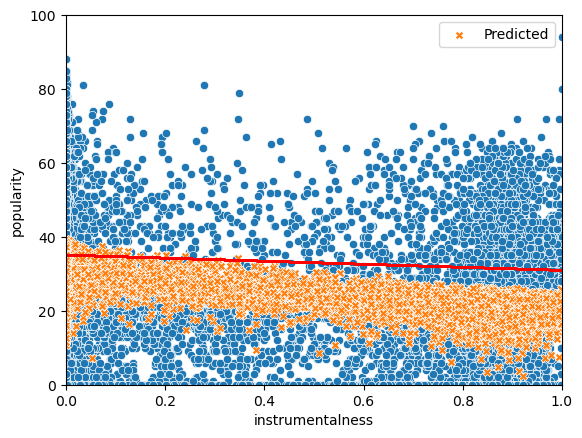

In [35]:
sns.scatterplot(data=df, x="instrumentalness", y="popularity")
sns.scatterplot(data=df, x="instrumentalness", y=reg.predict(X_train), label="Predicted", marker="X")
avg_coef = reg.coef_.mean()
plt.plot(X_train, avg_coef*X_train + reg.intercept_, c="red")
plt.ylim(0, 100)  # Limit y-axis to 0-100
plt.xlim(0, 1)  # Limit x-axis to 0-100
plt.show()

### Lasso

In [36]:
reg = Lasso(alpha=0.11044234247204798)
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_train)

print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

y_pred = reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

Coefficients: 
 [-1.32861761e+01 -1.12077034e+01 -6.23071880e-02 -6.83973082e-06
  0.00000000e+00  0.00000000e+00  1.96924333e+00  0.00000000e+00
 -2.69853103e+00]
Intercept: 
 34.47852761283418
R2: 0.095
MSE: 312.661
MAE: 14.530
R2: 0.109
MSE: 310.145
MAE: 14.518


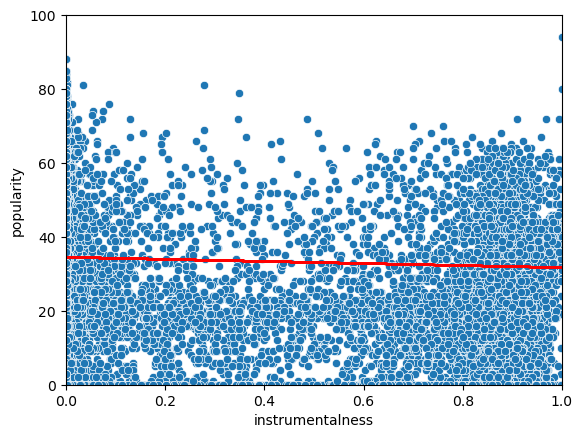

In [37]:
sns.scatterplot(data=df, x="instrumentalness", y="popularity")
avg_coef = reg.coef_.mean()
plt.plot(X_train, avg_coef*X_train + reg.intercept_, c="red")
plt.ylim(0, 100)  # Limit y-axis to 0-100
plt.xlim(0, 1)  # Limit x-axis to 0-100
plt.show()

## Nonlinear Regression

In [38]:
reg = DecisionTreeRegressor(ccp_alpha=0.5926967238793935,max_depth=11,max_features=None, min_samples_leaf=17,min_samples_split=39)

In [39]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.5926967238793935, max_depth=11,
                      min_samples_leaf=17, min_samples_split=39)

In [40]:
y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.194
MSE: 278.318
MAE: 13.324


In [41]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

R2: 0.198
MSE: 278.926
MAE: 13.333


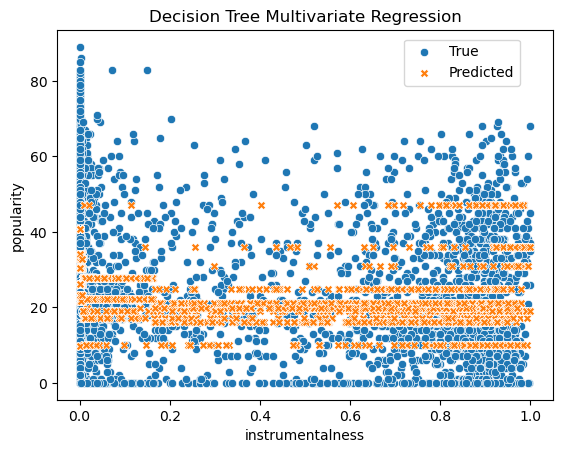

In [42]:
sns.scatterplot(data=test, x="instrumentalness", y="popularity", label="True")
sns.scatterplot(data=test, x="instrumentalness", y=reg.predict(X_test), label="Predicted", marker="X")
plt.title('Decision Tree Multivariate Regression')
plt.legend(loc='lower left', bbox_to_anchor=(0.70, 0.85), borderaxespad=0)
plt.savefig('DT_Multi_REG.png')
plt.show()

### KNN Regressor

In [43]:
reg = KNeighborsRegressor(algorithm='kd_tree',n_neighbors=646,p=1,weights='uniform')

In [44]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=646, p=1)

In [45]:
y_pred = reg.predict(X_train)
print('R2: %.3f' % r2_score(y_train, y_pred))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred))

R2: 0.030
MSE: 335.168
MAE: 15.226


In [46]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
Lista_r2.append(r2_score(y_test, y_pred))
Lista_mae.append(mean_absolute_error(y_test, y_pred))
Lista_mse.append(mean_squared_error(y_test, y_pred))

R2: 0.022
MSE: 340.224
MAE: 15.379


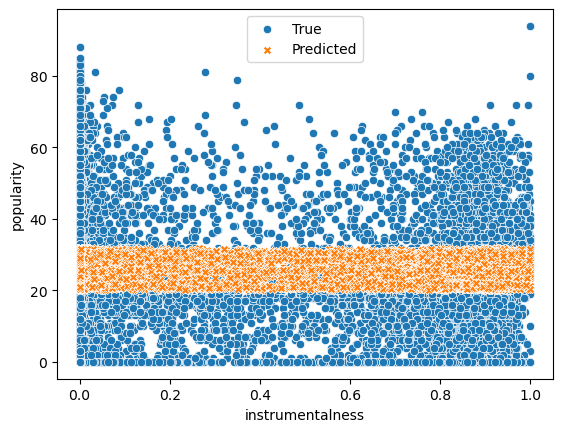

In [47]:
sns.scatterplot(data=df, x="instrumentalness", y="popularity", label="True")
sns.scatterplot(data=df, x="instrumentalness", y=reg.predict(X_train), label="Predicted", marker="X")
plt.legend()
plt.show()

## Final results

In [48]:
for nome, r2, mse, mae in zip(Lista_modelli, Lista_r2, Lista_mse, Lista_mae):
    print(f"{nome}: \n")
    print(f"\t r2: {round(r2, 3)}")
    print(f"\t mse: {round(mse, 3)}")
    print(f"\t mae: {round(mae, 3)} \n" )

Uni simple: 

	 r2: 0.09
	 mse: 316.436
	 mae: 14.763 

Uni ridge: 

	 r2: 0.09
	 mse: 316.453
	 mae: 14.763 

Uni lasso: 

	 r2: 0.089
	 mse: 316.922
	 mae: 14.786 

Uni Non-lin dec tree: 

	 r2: 0.121
	 mse: 305.95
	 mae: 14.336 

Uni Non-lin knn: 

	 r2: 0.126
	 mse: 304.143
	 mae: 14.293 

Multi simple: 

	 r2: 0.118
	 mse: 306.885
	 mae: 14.374 

multi ridge: 

	 r2: 0.118
	 mse: 306.89
	 mae: 14.375 

multi lasso: 

	 r2: 0.109
	 mse: 310.145
	 mae: 14.518 

dec tree: 

	 r2: 0.198
	 mse: 278.926
	 mae: 13.333 

multi Knn: 

	 r2: 0.022
	 mse: 340.224
	 mae: 15.379 

